In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:
# get the same random numbers each run, just for np.random
np.random.seed(0)

In [3]:
# number of points
n_pts = 500
# declare the points and labels from specific dataset
# make_circles: get two circles with different diameters tangled in each other
# n_samples: number of samples
# random_state: get the same random samples each run
# noise: the noise of concentracion of samples, higer noise means less concenteration
# factor: ratio of inner circle to the outer one
X, Y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)

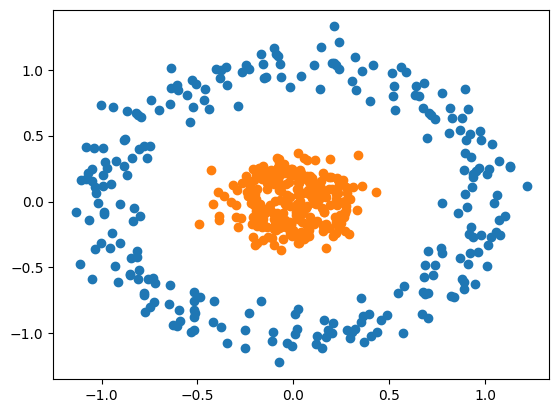

In [4]:
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plt.show()

In [ ]:
# choose the model
model = Sequential()
# define the hidden layer with four neurons, input shape 1D, and activation function sigmoid
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
# define the output layer with single neuron(output), and activation function sigmoid. input shape was declared in the last line
model.add(Dense(1, activation='sigmoid'))
# compile the model by Adam algorithm, learning rate 0.01, error function binary cross entropy, and storing accuracy
model.compile(Adam(learning_rate=0.01), 'binary_crossentropy', metrics=['accuracy'])
# fit the model and store the history in h
h = model.fit(x=X, y=Y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Text(0.5, 1.0, 'accuracy')

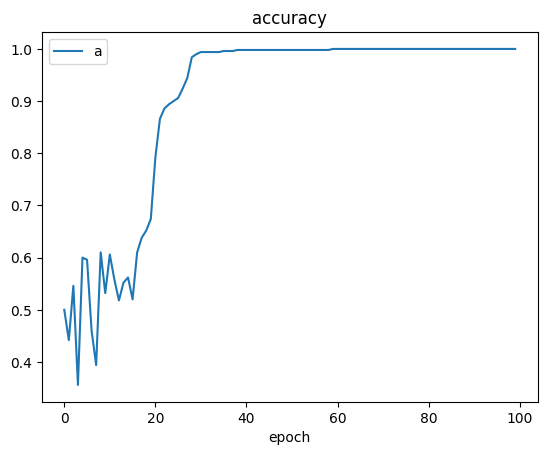

In [6]:
# plot the process of accuracy
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend('accuracy')
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

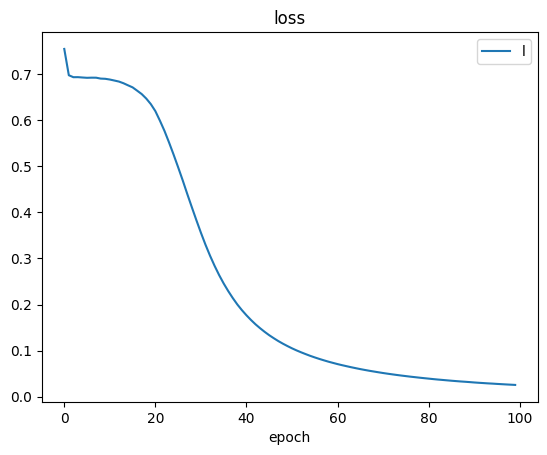

In [7]:
# plot the process of loss
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend('loss')
plt.title('loss')

In [8]:
# plot the contourf using points, labels and model
def plot_decision_boundary(X, y, model):
  # create the span of x and y values: [min - 1, max + 1]
  # the default length of the span is 50
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
  # create the 50x50 matrix for xs and ys
  # xx: [
  #   [x1, x2, ...]
  #   ...
  #   [x1, x2, ...]
  # ]
  # yy: [
  #   [y1, y1, ...]
  #   ...
  #   [y50, y50, ...]
  # ]
  xx, yy = np.meshgrid(x_span, y_span)
  # reshape the xx and yy into 1D
  xx_, yy_ = xx.ravel(), yy.ravel()
  # merge xx_ and yy_ column-wise
  grid = np.c_[xx_, yy_]
  # predict model using the grid
  predict_function = model.predict(grid)
  # reshape the z into xx shape, that is 50x50 to create the grids on the contourf
  z = predict_function.reshape(xx.shape)
  # plot the contourf
  plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


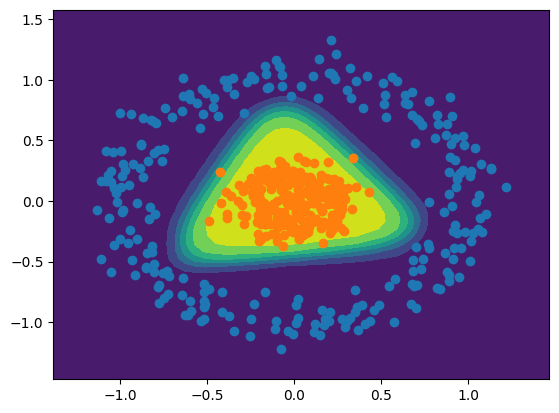

In [11]:
# plot the contourf using points, labels and model
plot_decision_boundary(X, Y, model)
# draw top and bottom points in different colors
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction is: [[0.98347205]]


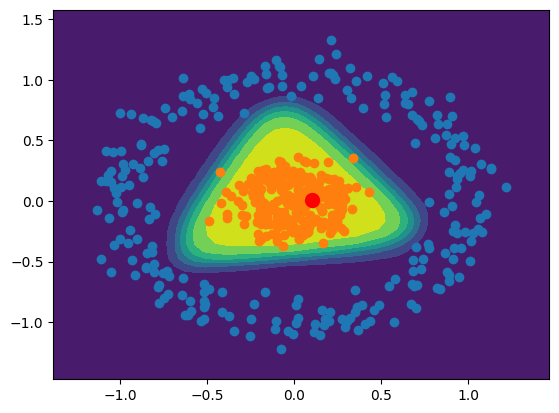

In [12]:
# plot the contourf using points, labels and model
plot_decision_boundary(X, Y, model)
# draw top and bottom points in different colors
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
# declare a point to test the prediction
x, y = 0.1, 0.01
point = np.array([[x, y]])
# store the prediction
prediction = model.predict(point)
# plot the point in a red circle, size 10 and output the prediction
plt.plot([x], [y], marker='o', markersize=10, color='red')
print(f'Prediction is: {prediction}')